In [2]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [4]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    display(data.describe())
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    data_val = data.drop(columns=['index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    msno.matrix(data_val)
    plt.show()

    data_val = data_val.replace(np.nan , 0)

    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_id , data_sig 

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,178.000000,178.000000,178.000000,178.000000,1.750000e+02,175.000000,175.000000,123.000000,123.000000,123.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,42.000000,43.000000,43.000000,43.000000,34.000000
mean,15.955056,54006.798315,144.960225,186409.489936,2.014916e-04,0.795570,5.881714,0.021851,0.020576,0.021014,...,12.279440,12.205298,3.722953,2.373093,918.832063,854.705982,0.790053,0.709491,715.361305,809.508824
std,20.396582,50232.118451,157.307164,225226.368097,2.334703e-04,0.171788,1.968811,0.044911,0.044475,0.044613,...,1.026341,0.948997,4.002563,1.537155,737.743684,694.597918,0.183866,0.152265,589.365404,497.907474
min,0.000000,4256.000000,1.840000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,10.999566,10.982967,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,2.000000,18909.425000,12.970000,1205.131000,5.171680e-07,0.822000,5.200000,0.000396,0.000240,0.000246,...,11.371631,11.351689,1.774000,1.532500,62.105000,54.757500,0.774500,0.651000,23.565000,290.725000
50%,6.000000,38737.400000,23.630000,3822.529000,9.064600e-06,0.830200,7.000000,0.001471,0.000690,0.000742,...,11.849858,11.816730,1.930000,1.722000,1537.000000,1415.000000,0.829600,0.774000,1198.000000,1125.000000
75%,25.750000,69689.200000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.010398,0.006612,0.008171,...,13.088610,13.031108,4.254000,2.657000,1561.500000,1473.250000,0.862000,0.811000,1227.500000,1153.500000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.231332,0.230371,0.230462,...,14.354381,14.233364,24.980000,7.716000,1644.000000,1559.000000,1.505000,0.931600,1300.000000,1231.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,457.000000,457.000000,457.000000,4.570000e+02,3.740000e+02,374.000000,374.000000,252.000000,252.000000,252.000000,...,89.000000,89.000000,75.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,65.000000
mean,19.984683,18208.739387,75.398140,inf,1.249864e-03,0.859357,6.351783,0.095869,0.081893,0.086465,...,11.892095,11.841281,5.271523,14.271911,222.281461,202.533614,0.821139,0.732137,136.741357,158.631232
std,23.103262,20755.421881,103.194246,inf,2.823860e-03,0.214277,2.185775,0.358086,0.346576,0.349108,...,0.904523,0.867588,11.412623,28.858137,324.310403,299.167274,0.752133,0.605041,224.271529,215.931804
min,0.000000,916.000000,1.740000,9.272045e+00,3.593717e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,9.764219,9.755723,0.357500,0.289700,10.860000,3.825000,0.216200,0.189000,0.007671,0.000000
25%,3.000000,4106.700000,5.500000,1.627296e+02,7.351000e-06,0.759600,5.200000,0.001457,0.000778,0.000849,...,11.342753,11.313721,0.759950,0.672800,34.860000,27.147500,0.340700,0.302600,7.737000,20.850000
50%,10.000000,9838.600000,44.360000,1.856473e+03,1.176452e-05,0.999600,7.800000,0.004923,0.002684,0.003476,...,11.928486,11.875170,1.222000,1.163000,53.250000,45.325000,0.553700,0.518600,32.200000,95.910000
75%,31.000000,28597.000000,103.560000,9.049175e+03,1.277774e-03,1.000000,8.000000,0.054330,0.032700,0.047349,...,12.355660,12.324680,2.400000,8.476000,211.300000,188.025000,0.876600,0.850600,134.700000,129.900000
max,94.000000,166689.200000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,4.011572,4.008746,4.009324,...,13.772628,13.634887,75.050000,99.720000,1410.000000,1195.000000,4.342000,2.837000,921.900000,753.100000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,95.000000,95.000000,95.000000,95.000000,6.400000e+01,64.000000,64.000000,91.000000,91.000000,91.000000,...,40.000000,40.000000,32.000000,40.000000,40.000000,21.000000,40.000000,40.000000,40.000000,13.000000
mean,3.800000,38167.429474,34.787368,13917.093891,1.569417e-05,0.549704,3.207812,10.811307,0.008486,0.027849,...,12.745523,12.679084,172.910084,15.949073,65.215895,94.668162,1.084760,0.857302,18.581310,25.214215
std,6.295219,34566.563684,43.706247,22823.233977,2.432501e-05,0.237813,1.819018,103.045688,0.014996,0.183337,...,0.599896,0.555087,809.731605,25.729744,103.320202,91.493272,1.148652,0.680336,37.163859,28.506009
min,0.000000,3903.900000,1.840000,23.550950,3.031800e-07,0.099000,0.000000,0.000150,0.000068,0.000105,...,11.726999,11.693146,0.522700,0.409700,0.733300,0.296400,0.185600,0.163100,0.104400,0.242800
25%,0.000000,10162.000000,5.690000,390.680900,4.354550e-07,0.435812,2.062500,0.001266,0.000715,0.000823,...,12.286735,12.255141,5.523500,4.222000,2.864000,35.960000,0.588850,0.525050,0.361625,4.938000
50%,1.000000,24735.600000,12.860000,767.561600,1.856350e-06,0.594000,3.200000,0.003089,0.001824,0.002029,...,12.535139,12.505852,6.167500,5.092500,18.955000,71.940000,0.634600,0.582650,1.045500,11.790000
75%,4.000000,49106.450000,34.310000,7690.349500,1.984400e-05,0.782800,5.000000,0.012217,0.011797,0.012088,...,13.355166,13.203847,7.161000,6.587500,98.405000,145.400000,0.866600,0.817975,17.155000,40.620000
max,24.000000,166935.300000,144.290000,62909.280000,8.061540e-05,0.900000,6.200000,983.002387,0.073643,1.751740,...,13.901702,13.773916,4544.000000,93.450000,519.700000,379.300000,5.770000,3.038000,182.100000,87.780000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,436.000000,436.000000,436.000000,4.360000e+02,3.960000e+02,396.000000,396.000000,311.000000,311.000000,311.000000,...,72.000000,72.000000,70.000000,72.000000,72.000000,70.000000,72.000000,72.000000,72.000000,44.000000
mean,17.809633,33533.693119,74.466101,inf,4.507791e-04,0.839529,6.158502,0.015672,0.007871,0.009661,...,12.688031,12.601176,3.135317,2.580017,203.834010,172.177632,0.561328,0.487911,145.161122,184.236659
std,23.511269,39790.159100,112.466350,inf,1.810711e-03,0.202917,2.165424,0.068593,0.019712,0.021791,...,0.702601,0.636277,4.184190,4.614479,432.506747,383.192570,0.336814,0.261147,343.087309,359.124767
min,0.000000,977.000000,2.110000,1.136733e+01,3.593717e-08,0.126000,0.000000,0.000105,0.000057,0.000061,...,11.472370,11.449283,0.357500,0.289700,0.648700,0.083260,0.216200,0.189000,0.077480,0.000000
25%,2.000000,5077.625000,12.970000,4.582053e+02,1.131475e-06,0.772250,4.500000,0.000722,0.000468,0.000504,...,12.177783,12.134664,0.740250,0.654100,19.342500,16.647500,0.326350,0.288000,0.991300,15.187500
50%,7.000000,24046.100000,28.020000,1.934920e+03,7.351000e-06,0.859000,7.000000,0.002258,0.001331,0.001496,...,12.479616,12.434255,1.428000,1.181000,44.400000,36.825000,0.441850,0.390700,22.065000,21.760000
75%,24.250000,39663.475000,49.260000,1.181523e+04,1.065084e-04,1.000000,8.000000,0.007477,0.004337,0.005858,...,13.210228,13.079791,4.183500,2.724750,78.575000,58.615000,0.772400,0.689075,38.960000,75.015000
max,94.000000,184208.000000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.203490,0.203719,...,14.354381,14.233364,24.980000,32.540000,1627.000000,1485.000000,2.187000,1.651000,1299.000000,1169.000000


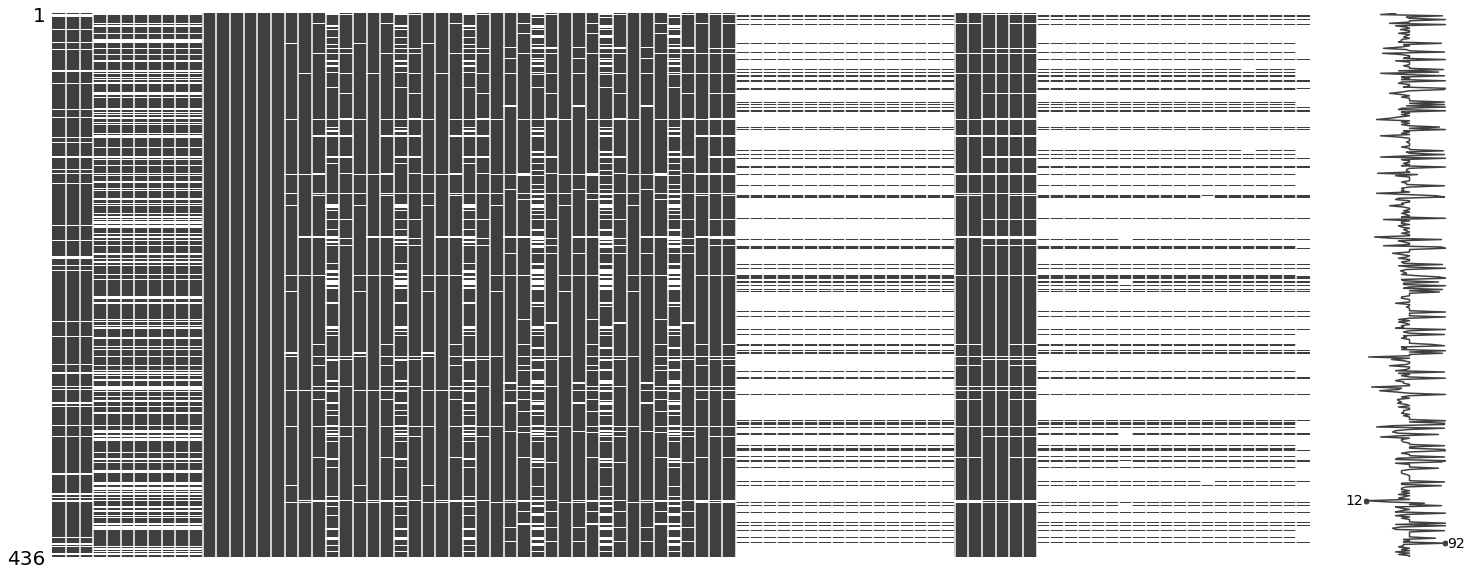

In [5]:
train_bh = pd.read_csv('processed_data/BH_train.csv')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_train.csv')
train_ns = train_ns.sample(frac=1)
#display(data_ns)
display(train_ns.describe())


train_pulsar = pd.read_csv('processed_data/PULSAR.csv')
display(train_pulsar.describe())
train_cv = pd.read_csv('processed_data/CV.csv')
train_cv.describe()
train_cv= train_cv.sample(frac=1)
train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_id , data_sig = filter_data(train)

In [6]:
train_data[['flux_aper_hilim' , 'flux_aper_lolim' ,'flux_aper']].describe()

,flux_aper_hilim,flux_aper_lolim,flux_aper
count,436.000000,436.000000,436.000000
mean,13.893939,14.458790,14.152057
std,0.788264,1.090452,0.890480
min,11.997434,12.022661,12.009448
25%,13.373786,13.772354,13.603988
50%,13.908669,14.432731,14.193013
75%,14.414897,15.178032,14.741801
max,15.619355,17.809276,16.652865


In [7]:
data_bh_clean = train_data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = train_data[data_class['class']=='NS']
display(data_ns_clean.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,139.000000,139.000000,139.000000,139.000000,1.360000e+02,136.000000,136.000000,103.000000,103.000000,103.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,15.000000
mean,11.201439,62067.446043,123.827338,155204.757680,1.689480e-04,0.784533,5.682721,0.005435,0.004085,0.004554,...,12.986881,12.870010,4.916042,2.687458,471.232863,406.484403,0.740429,0.626642,358.925671,458.539333
std,16.216461,53473.631829,150.886301,216634.472279,2.254513e-04,0.173522,2.016436,0.013078,0.010346,0.011406,...,0.840691,0.753615,4.859409,1.598601,652.195561,588.643007,0.234573,0.159171,522.295875,509.903354
min,0.000000,4490.400000,2.110000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,11.820448,11.766243,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,1.000000,24613.300000,13.950000,1205.131000,5.171680e-07,0.678612,4.125000,0.000343,0.000204,0.000223,...,12.347116,12.308654,2.404500,1.478750,14.670000,6.694500,0.548050,0.496575,0.991300,20.915000
50%,5.000000,40580.400000,17.390000,1457.845000,1.771040e-06,0.830200,7.000000,0.000632,0.000441,0.000467,...,13.060783,13.002482,3.849500,2.280500,71.600000,57.580000,0.784400,0.679550,30.375000,252.300000
75%,10.500000,75682.200000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.003474,0.002275,0.002687,...,13.388002,13.266004,4.942500,3.239250,922.675000,588.750000,0.830550,0.732425,738.650000,1087.000000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.085673,0.057274,0.060776,...,14.354381,14.233364,24.980000,7.703000,1627.000000,1485.000000,1.505000,0.931600,1299.000000,1169.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,297.000000,297.000000,297.000000,2.970000e+02,2.600000e+02,260.000000,260.000000,208.000000,208.000000,208.000000,...,48.000000,48.000000,46.000000,48.000000,48.000000,47.000000,48.000000,48.000000,48.000000,29.000000
mean,20.902357,20179.512458,51.364377,inf,5.981984e-04,0.868296,6.407372,0.020741,0.009746,0.012190,...,12.538606,12.466759,2.206243,2.526296,70.134583,57.516872,0.471777,0.418546,38.278848,42.355966
std,25.683769,20793.374959,79.338284,inf,2.215914e-03,0.211384,2.202471,0.082970,0.022771,0.025052,...,0.575719,0.527538,3.493122,5.559427,140.218121,116.852118,0.346231,0.275468,96.542713,83.090430
min,0.000000,977.000000,2.320000,1.257282e+01,3.593717e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,11.472370,11.449283,0.357500,0.289700,11.910000,6.983000,0.216200,0.189000,0.077480,0.000000
25%,2.000000,4120.000000,6.940000,1.627296e+02,7.351000e-06,0.772250,4.625000,0.001202,0.000661,0.000732,...,12.177783,12.134664,0.639150,0.564025,24.792500,19.540000,0.285475,0.274125,1.045750,14.900000
50%,9.000000,13620.500000,31.120000,5.716484e+03,7.351000e-06,1.000000,7.800000,0.003146,0.001714,0.001973,...,12.344470,12.300447,0.829150,0.685050,41.815000,34.120000,0.347050,0.307300,19.980000,20.850000
75%,33.000000,29672.100000,49.260000,9.049175e+03,4.579440e-05,1.000000,8.000000,0.010325,0.005094,0.006655,...,13.015519,12.958805,1.310500,1.413000,51.502500,44.360000,0.514500,0.471000,29.612500,27.270000
max,94.000000,158025.600000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.203490,0.203719,...,13.772628,13.634887,14.700000,32.540000,973.500000,800.600000,2.187000,1.651000,659.700000,455.500000


In [8]:
def split_data(x,y,s,id,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    id_train = id[:split_no]
    id_test = id[split_no:]
    return (x_train , y_train , s_train , id_train ) , (x_test , y_test , s_test , id_test)

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s/np.amax(s)
#s = [float(si) for si in s]
(x_train , y_train , s_train , id_train) , (x_test , y_test , s_test , id_test) =  split_data(x, y,s, data_id , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(436, 92) (436, 1)
(0, 92) (0, 1)


# Neural Network

In [9]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [10]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = desc_class.value_counts()['NS']
bh_n= desc_class.value_counts()['BH']
print(ns_n , bh_n)

297 139


In [12]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])
class_weight = {0: (ns_n/(ns_n+bh_n)),
                1: (bh_n/(ns_n+bh_n))}
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=70, validation_split=0.2 , class_weight=class_weight , sample_weight=s_train)


Epoch 1/70
11/11 [==============================] - 2s 90ms/step - loss: 0.0513 - accuracy: 0.4224 - val_loss: 0.1159 - val_accuracy: 0.3636
Epoch 2/70
11/11 [==============================] - 0s 36ms/step - loss: 0.0488 - accuracy: 0.3196 - val_loss: 0.1138 - val_accuracy: 0.3409
Epoch 3/70
11/11 [==============================] - 0s 49ms/step - loss: 0.0461 - accuracy: 0.3077 - val_loss: 0.1111 - val_accuracy: 0.3409
Epoch 4/70
11/11 [==============================] - 0s 46ms/step - loss: 0.0503 - accuracy: 0.3090 - val_loss: 0.1075 - val_accuracy: 0.3409
Epoch 5/70
11/11 [==============================] - 0s 32ms/step - loss: 0.0428 - accuracy: 0.3346 - val_loss: 0.1037 - val_accuracy: 0.3409
Epoch 6/70
11/11 [==============================] - 0s 35ms/step - loss: 0.0444 - accuracy: 0.3127 - val_loss: 0.0989 - val_accuracy: 0.3409
Epoch 7/70
11/11 [==============================] - 0s 38ms/step - loss: 0.0376 - accuracy: 0.3081 - val_loss: 0.0941 - val_accuracy: 0.3409
Epoch 8/70
11

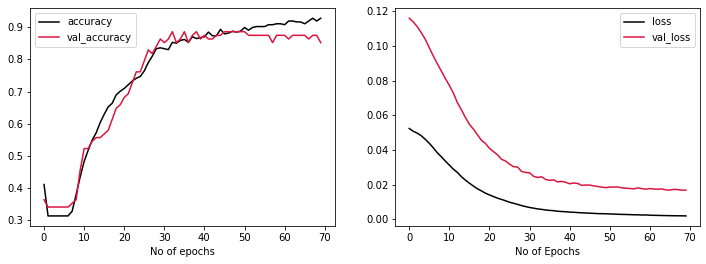

In [13]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

In [14]:
model.save('models/NN_NS_BH.mdl')
#np.save('test_data/NN_NS_BH.cv' , x_test)
#np.save('test_data/NN_NS_BH_label.cv' , one_hot_y_test)

2021-09-28 16:09:59.981835: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/NN_NS_BH.mdl/assets


In [15]:
import seaborn as sns

In [16]:
%reload_ext autoreload

In [17]:
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *



In [18]:
font = {'size'   : 14}
plt.rc('font', **font)

In [19]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

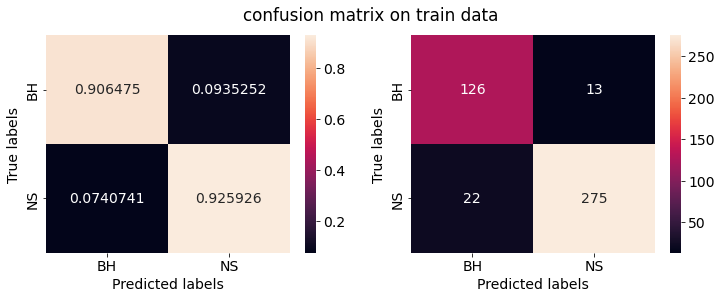

In [20]:
cf = conf_matrix(model , x_train, one_hot_y_train)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels'); 
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']); 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

## TEST

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,23.000000,23.000000,23.000000,...,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.0000
mean,3.781250,74257.984375,47.182187,34247.608181,8.815325e-04,0.863113,5.981250,0.609907,0.340178,0.461090,...,11.243918,11.211909,138.095333,36.092600,1047.746200,958.628400,2.105700,1.708460,794.187800,887.1250
std,2.744312,63221.523341,64.813123,63213.009603,1.655440e-03,0.105178,1.132635,1.214688,0.881511,0.985913,...,0.612477,0.602681,133.554931,33.140291,585.095119,534.325368,1.155831,0.692874,449.828726,88.3377
min,0.000000,4256.000000,4.580000,82.894680,4.139120e-07,0.761000,4.800000,0.000190,0.000065,0.000137,...,10.713993,10.694434,1.686000,1.523000,9.731000,5.142000,0.770500,0.732300,1.439000,777.3000
25%,1.750000,15043.050000,4.580000,82.894680,4.139120e-07,0.761000,4.800000,0.000335,0.000190,0.000196,...,11.014978,10.990124,72.843000,16.290000,1205.000000,1143.000000,1.872000,1.632000,870.100000,844.2000
50%,3.500000,57983.550000,16.290000,1238.383000,1.426325e-06,0.807400,5.500000,0.000475,0.000300,0.000307,...,11.068237,11.033905,144.000000,21.710000,1290.000000,1184.000000,1.886000,1.675000,982.400000,892.0500
75%,6.000000,129113.000000,26.510000,4017.937000,9.395600e-05,0.992800,7.200000,0.614308,0.091091,0.397784,...,11.119701,11.085921,206.300000,59.620000,1319.000000,1219.000000,2.036000,1.821000,1055.000000,934.9750
max,9.000000,184208.000000,166.940000,151803.000000,3.960122e-03,0.997200,7.600000,4.403000,3.219000,3.219000,...,12.302683,12.255160,268.600000,81.320000,1415.000000,1242.000000,3.964000,2.682000,1062.000000,987.1000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,35.00000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,28.000000,28.000000,28.000000,...,6.000000,6.000000,4.00000,6.000000,6.000000,4.000000,6.000000,6.000000,6.000000,1.0
mean,2.60000,58672.694286,15.409143,1934.018203,5.239268e-05,0.826643,5.557143,0.016824,0.005761,0.007337,...,12.870924,12.747979,16.58150,16.362833,352.218500,221.268000,14.943483,0.998383,212.599150,136.2
std,2.58047,59599.310896,11.054052,3820.019408,9.665966e-05,0.167324,1.644233,0.052208,0.017553,0.018741,...,0.504294,0.420991,15.85458,31.832523,667.111663,378.466016,33.433204,0.928568,489.340219,NaN
min,0.00000,1079.800000,4.580000,82.894680,3.118000e-08,0.270500,1.500000,0.000190,0.000065,0.000137,...,12.302683,12.255160,2.65500,2.355000,9.731000,5.142000,0.200000,0.187800,0.349200,136.2
25%,1.00000,11296.650000,6.980000,140.316400,4.139120e-07,0.794000,4.800000,0.000389,0.000192,0.000203,...,12.406683,12.364414,4.02450,2.807750,90.155000,31.758000,0.407175,0.334825,0.829775,136.2
50%,2.00000,36445.900000,16.290000,289.506100,5.484750e-06,0.807400,4.800000,0.000827,0.000447,0.000487,...,12.956985,12.844060,13.97550,3.782500,99.605000,45.865000,1.082500,0.804250,15.664500,136.2
75%,4.00000,75682.200000,16.720000,1238.383000,8.867133e-05,0.997200,7.600000,0.004526,0.003072,0.004281,...,13.231934,13.056444,26.53250,4.286250,103.925000,235.375000,3.258500,1.201300,31.690000,136.2
max,9.00000,184208.000000,49.440000,16287.030000,3.924485e-04,1.000000,8.000000,0.264078,0.091976,0.092224,...,13.462055,13.212823,35.72000,81.320000,1712.000000,788.200000,83.130000,2.682000,1211.000000,136.2


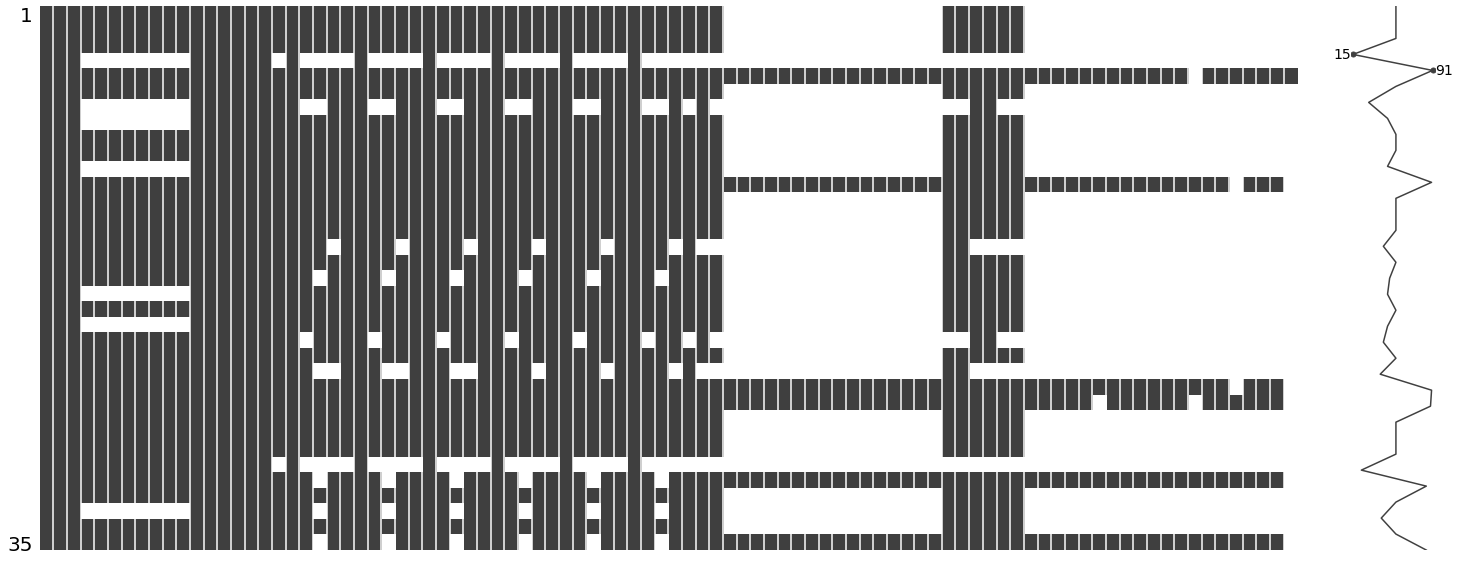

,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,var_sigma,kp_prob,ks_prob,var_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,3.172066e-18,1.506731e-16,6.661338e-17,1.090398e-17,-6.245005e-18,1.595946e-17,-9.516197e-18,-5.551115e-17,1.903239e-17,-1.681195e-16,...,-1.268826e-17,-3.172066e-17,2.854859e-17,-1.863589e-17,-3.568574e-18,-1.288652e-17,1.566207e-17,-2.061843e-17,6.071532e-18,-5.749369e-18
std,2.842465e-01,9.651972e-01,6.730777e-01,1.876265e-01,1.810295e-01,1.964470e-01,1.782987e-01,5.293827e-01,5.534908e-01,4.870364e-01,...,4.375995e-01,4.422881e-01,2.107754e-01,1.747097e-01,1.750482e-01,1.745840e-01,1.742221e-01,2.079215e-01,1.741136e-01,1.740023e-01
min,-1.539791e-01,-3.208076e+00,-1.660819e+00,-5.370413e-02,-5.275662e-02,-6.797572e-02,-3.878621e-02,-7.475820e-01,-7.835282e-01,-6.997023e-01,...,-1.960306e-01,-1.981752e-01,-5.602454e-02,-3.572641e-02,-3.655824e-02,-3.314637e-02,-3.179590e-02,-6.816478e-02,-3.102927e-02,-2.941176e-02
25%,-1.528536e-01,-1.882983e-01,-3.099415e-01,-5.267242e-02,-5.147278e-02,-6.617275e-02,-3.855943e-02,-3.001343e-01,-3.748550e-01,-4.221251e-01,...,-1.960306e-01,-1.981752e-01,-5.602454e-02,-3.572641e-02,-3.655824e-02,-3.314637e-02,-3.179590e-02,-6.816478e-02,-3.102927e-02,-2.941176e-02
50%,-1.379419e-01,-1.110012e-01,-3.099415e-01,-5.181415e-02,-4.998211e-02,-6.501558e-02,-3.784120e-02,9.819280e-04,2.132596e-02,6.571568e-02,...,-1.960306e-01,-1.981752e-01,-5.602454e-02,-3.572641e-02,-3.655824e-02,-3.314637e-02,-3.179590e-02,-6.816478e-02,-3.102927e-02,-2.941176e-02
75%,1.066844e-01,9.838484e-01,8.362573e-01,-4.255373e-02,-3.527859e-02,-4.899339e-02,-3.546825e-02,3.824785e-01,4.103685e-01,3.036062e-01,...,-1.960306e-01,-1.981752e-01,-5.602454e-02,-3.572641e-02,-3.655824e-02,-3.314637e-02,-3.179590e-02,-6.816478e-02,-3.102927e-02,-2.941176e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


(35, 2)


In [21]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
display(test_bh.describe())
test_ns = pd.read_csv('processed_data/NS_test.csv')
test_pulsar = pd.read_csv('processed_data/PULSAR.csv')
test_cv = pd.read_csv('processed_data/CV.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test = test.sample(frac=1)
test_data , t_val , t_class , t_id , t_sig = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

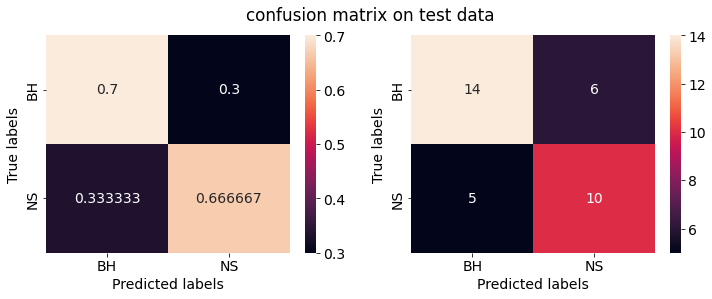

In [22]:
cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

In [23]:
y_test_pred_prob =  model.predict(x_test)
y_test_pred = []
for yi in y_test_pred_prob:
    temp = [0]*len(yi)
    temp[np.argmax(yi)] = 1
    y_test_pred.append(temp)
y_test_pred =  np.asarray(y_test_pred)
miss_cl_data = pd.DataFrame()
missed_src = []
for yp , yh , si ,  y_prob in zip(y_test_pred , one_hot_y_test , t_id , y_test_pred_prob):
    chk = np.dot(yp,yh)
    if(chk<1):
        #print(y_prob,  si)
        data_sneak = test[test['src_id'] == si]
        display(data_sneak)
        miss_cl_data = miss_cl_data.append(data_sneak)
        missed_src.append(si)
miss_src_cnt =  pd.DataFrame()
miss_src_cnt.insert(0,'src' ,missed_src)
miss_src_cnt = miss_src_cnt['src'].value_counts()
display(miss_src_cnt)
display(miss_cl_data)
#missed_src_count = missed_src.count_val()

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,3,BH,BH0009,SAX J1819.3-2525,18284.8,26.51,4017.937,2004-07-30T18:26:28,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,BH,BH0009,SAX J1819.3-2525,9209.3,26.51,4017.937,2004-07-17T11:09:06,0.000094,0.9972,...,12.302683,12.25516,NaN,81.32,9.731,5.142,3.964,2.682,1.439,NaN
7,0,BH,BH0009,SAX J1819.3-2525,25256.9,26.51,4017.937,2002-10-21T03:50:49,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,BH,BH0009,SAX J1819.3-2525,36445.9,26.51,4017.937,2004-08-10T04:39:07,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,BH,BH0009,SAX J1819.3-2525,4256.0,26.51,4017.937,2002-08-05T04:22:47,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
5,0,NS,NS0059,J1749-2808,1079.8,6.98,241.424,2010-04-25T12:41:05,3.118000e-08,0.2705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NS,NS0059,J1749-2808,24403.2,6.98,241.424,2012-07-30T02:38:34,3.118000e-08,0.2705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
20,8,BH,BH0017,CXOU J100510.9-07453,69686.1,4.58,82.89468,2012-04-06T18:15:48,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0,BH,BH0017,CXOU J100510.9-07453,40580.4,4.58,82.89468,2010-01-27T01:02:52,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3,BH,BH0017,CXOU J100510.9-07453,75554.3,4.58,82.89468,2012-01-26T22:21:59,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2,BH,BH0017,CXOU J100510.9-07453,171955.9,4.58,82.89468,2012-01-18T14:26:38,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,6,BH,BH0017,CXOU J100510.9-07453,160215.7,4.58,82.89468,2012-01-21T08:54:47,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,7,BH,BH0017,CXOU J100510.9-07453,119470.1,4.58,82.89468,2012-04-04T03:00:56,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,9,BH,BH0017,CXOU J100510.9-07453,46277.9,4.58,82.89468,2012-04-05T19:03:53,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,BH,BH0017,CXOU J100510.9-07453,75682.2,4.58,82.89468,2010-01-29T14:46:35,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,5,BH,BH0017,CXOU J100510.9-07453,158013.8,4.58,82.89468,2012-02-03T10:00:00,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,4,BH,BH0017,CXOU J100510.9-07453,184208.0,4.58,82.89468,2012-01-31T15:24:33,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,3,BH,BH0009,SAX J1819.3-2525,18284.8,26.51,4017.937,2004-07-30T18:26:28,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,BH,BH0009,SAX J1819.3-2525,9209.3,26.51,4017.937,2004-07-17T11:09:06,0.000094,0.9972,...,12.302683,12.25516,NaN,81.32,9.731,5.142,3.964,2.682,1.439,NaN
7,0,BH,BH0009,SAX J1819.3-2525,25256.9,26.51,4017.937,2002-10-21T03:50:49,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,BH,BH0009,SAX J1819.3-2525,36445.9,26.51,4017.937,2004-08-10T04:39:07,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,BH,BH0009,SAX J1819.3-2525,4256.0,26.51,4017.937,2002-08-05T04:22:47,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
20,8,BH,BH0017,CXOU J100510.9-07453,69686.1,4.58,82.89468,2012-04-06T18:15:48,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0,BH,BH0017,CXOU J100510.9-07453,40580.4,4.58,82.89468,2010-01-27T01:02:52,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3,BH,BH0017,CXOU J100510.9-07453,75554.3,4.58,82.89468,2012-01-26T22:21:59,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2,BH,BH0017,CXOU J100510.9-07453,171955.9,4.58,82.89468,2012-01-18T14:26:38,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,6,BH,BH0017,CXOU J100510.9-07453,160215.7,4.58,82.89468,2012-01-21T08:54:47,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,7,BH,BH0017,CXOU J100510.9-07453,119470.1,4.58,82.89468,2012-04-04T03:00:56,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,9,BH,BH0017,CXOU J100510.9-07453,46277.9,4.58,82.89468,2012-04-05T19:03:53,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,BH,BH0017,CXOU J100510.9-07453,75682.2,4.58,82.89468,2010-01-29T14:46:35,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,5,BH,BH0017,CXOU J100510.9-07453,158013.8,4.58,82.89468,2012-02-03T10:00:00,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,4,BH,BH0017,CXOU J100510.9-07453,184208.0,4.58,82.89468,2012-01-31T15:24:33,0.000001,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,1,NS,NS0068,SAXWFC J1744.9-2921.,19724.6,9.04,140.3164,2006-10-31T04:15:03,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3,NS,NS0068,SAXWFC J1744.9-2921.,97909.1,9.04,140.3164,2005-07-22T02:13:10,0.000005,0.794,...,13.462055,13.212823,NaN,4.289,1712.0,788.2,83.13,1.312,1211.0,136.2
7,0,NS,NS0068,SAXWFC J1744.9-2921.,11481.5,9.04,140.3164,2001-07-19T10:12:01,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,NS,NS0068,SAXWFC J1744.9-2921.,11111.8,9.04,140.3164,2001-07-19T06:51:51,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,NS,NS0068,SAXWFC J1744.9-2921.,19291.8,9.04,140.3164,2007-02-19T02:06:10,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,5,NS,NS0068,SAXWFC J1744.9-2921.,36668.9,9.04,140.3164,2007-04-25T14:28:01,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,3,BH,BH0009,SAX J1819.3-2525,18284.8,26.51,4017.937,2004-07-30T18:26:28,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,BH,BH0009,SAX J1819.3-2525,9209.3,26.51,4017.937,2004-07-17T11:09:06,0.000094,0.9972,...,12.302683,12.25516,NaN,81.32,9.731,5.142,3.964,2.682,1.439,NaN
7,0,BH,BH0009,SAX J1819.3-2525,25256.9,26.51,4017.937,2002-10-21T03:50:49,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,BH,BH0009,SAX J1819.3-2525,36445.9,26.51,4017.937,2004-08-10T04:39:07,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,BH,BH0009,SAX J1819.3-2525,4256.0,26.51,4017.937,2002-08-05T04:22:47,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
14,1,NS,NS0077,1WGA J1747.4-3002,30547.7,17.15,289.5061,2013-07-25T23:01:10,0.000392,0.88125,...,13.236497,13.056456,23.47,3.287,87.67,40.63,1.023,0.7393,29.89,NaN
13,0,NS,NS0077,1WGA J1747.4-3002,29715.4,17.15,289.5061,2013-03-28T19:40:21,0.000392,0.88125,...,13.218245,13.056407,35.72,4.278,104.70,51.10,1.142,0.8692,32.29,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,1,NS,NS0068,SAXWFC J1744.9-2921.,19724.6,9.04,140.3164,2006-10-31T04:15:03,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3,NS,NS0068,SAXWFC J1744.9-2921.,97909.1,9.04,140.3164,2005-07-22T02:13:10,0.000005,0.794,...,13.462055,13.212823,NaN,4.289,1712.0,788.2,83.13,1.312,1211.0,136.2
7,0,NS,NS0068,SAXWFC J1744.9-2921.,11481.5,9.04,140.3164,2001-07-19T10:12:01,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,NS,NS0068,SAXWFC J1744.9-2921.,11111.8,9.04,140.3164,2001-07-19T06:51:51,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,NS,NS0068,SAXWFC J1744.9-2921.,19291.8,9.04,140.3164,2007-02-19T02:06:10,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,5,NS,NS0068,SAXWFC J1744.9-2921.,36668.9,9.04,140.3164,2007-04-25T14:28:01,0.000005,0.794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,3,BH,BH0009,SAX J1819.3-2525,18284.8,26.51,4017.937,2004-07-30T18:26:28,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,BH,BH0009,SAX J1819.3-2525,9209.3,26.51,4017.937,2004-07-17T11:09:06,0.000094,0.9972,...,12.302683,12.25516,NaN,81.32,9.731,5.142,3.964,2.682,1.439,NaN
7,0,BH,BH0009,SAX J1819.3-2525,25256.9,26.51,4017.937,2002-10-21T03:50:49,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,BH,BH0009,SAX J1819.3-2525,36445.9,26.51,4017.937,2004-08-10T04:39:07,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,BH,BH0009,SAX J1819.3-2525,4256.0,26.51,4017.937,2002-08-05T04:22:47,0.000094,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
14,1,NS,NS0077,1WGA J1747.4-3002,30547.7,17.15,289.5061,2013-07-25T23:01:10,0.000392,0.88125,...,13.236497,13.056456,23.47,3.287,87.67,40.63,1.023,0.7393,29.89,NaN
13,0,NS,NS0077,1WGA J1747.4-3002,29715.4,17.15,289.5061,2013-03-28T19:40:21,0.000392,0.88125,...,13.218245,13.056407,35.72,4.278,104.70,51.10,1.142,0.8692,32.29,NaN


BH0009    4
BH0017    2
NS0068    2
NS0077    2
NS0059    1
Name: src, dtype: int64

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,3,BH,BH0009,SAX J1819.3-2525,18284.8,26.51,4017.93700,2004-07-30T18:26:28,9.395600e-05,0.99720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,BH,BH0009,SAX J1819.3-2525,9209.3,26.51,4017.93700,2004-07-17T11:09:06,9.395600e-05,0.99720,...,12.302683,12.255160,NaN,81.320,9.731,5.142,3.964,2.6820,1.439,NaN
7,0,BH,BH0009,SAX J1819.3-2525,25256.9,26.51,4017.93700,2002-10-21T03:50:49,9.395600e-05,0.99720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4,BH,BH0009,SAX J1819.3-2525,36445.9,26.51,4017.93700,2004-08-10T04:39:07,9.395600e-05,0.99720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,BH,BH0009,SAX J1819.3-2525,4256.0,26.51,4017.93700,2002-08-05T04:22:47,9.395600e-05,0.99720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,NS,NS0059,J1749-2808,1079.8,6.98,241.42400,2010-04-25T12:41:05,3.118000e-08,0.27050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NS,NS0059,J1749-2808,24403.2,6.98,241.42400,2012-07-30T02:38:34,3.118000e-08,0.27050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,8,BH,BH0017,CXOU J100510.9-07453,69686.1,4.58,82.89468,2012-04-06T18:15:48,1.426325e-06,0.76100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0,BH,BH0017,CXOU J100510.9-07453,40580.4,4.58,82.89468,2010-01-27T01:02:52,1.426325e-06,0.76100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3,BH,BH0017,CXOU J100510.9-07453,75554.3,4.58,82.89468,2012-01-26T22:21:59,1.426325e-06,0.76100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_sneak = test[test['src_id'] == 'NS0061']
display(data_sneak)

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
